# Setup
## Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import scipy

from generative_social_choice.utils.helper_functions import get_base_dir_path
from generative_social_choice.slates.voting_utils import gini
from generative_social_choice.ratings.utility_matrix import extract_voter_utilities_from_info_csv
from generative_social_choice.utils.postprocessing import (
    plot_sorted_utility_distributions,
    plot_likert_category_clustered_bar_chart,
    scalar_utility_metrics,
    plot_candidate_distribution_stacked,
    
)


# Embedding Ablation

## Single-Run Plots

In [3]:
# bjr_with_baseline_embeddings_paths = get_results_paths(labelling_model=LABELLING_MODEL, embedding_type="seed_statement", baseline=False)

bjr_with_baseline_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-232314__generate_slate_via_fish_nn" / "info.csv"
bjr_with_baseline_embeddings = extract_voter_utilities_from_info_csv(bjr_with_baseline_embeddings_path)
bjr_with_baseline_embeddings.head()

,candidate_id,utility
Voter,,
generation1,18,3.652164
generation10,3,3.996646
generation100,17,3.871335
generation11,9,3.996955
generation12,18,3.389729


In [4]:
bjr_with_openai_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-235156__generate_slate_via_openai_embeddings_nn" / "info.csv"
df_bjr_with_openai_embeddings = extract_voter_utilities_from_info_csv(bjr_with_openai_embeddings_path)
df_bjr_with_openai_embeddings.head()

,candidate_id,utility
Voter,,
generation1,13,3.898625
generation10,13,3.990606
generation100,13,3.872195
generation11,6,3.996033
generation12,21,3.950161


In [5]:
embedding_ablation_utilities = pd.concat([
    bjr_with_baseline_embeddings.utility.rename("Baseline Embeddings"),
    df_bjr_with_openai_embeddings.utility.rename("OpenAI Embeddings")
],
axis=1)
embedding_ablation_utilities

,Baseline Embeddings,OpenAI Embeddings
Voter,,
generation1,3.652164,3.898625
generation10,3.996646,3.990606
generation100,3.871335,3.872195
generation11,3.996955,3.996033
generation12,3.389729,3.950161
...,...,...
generation95,2.217852,3.940947
generation96,3.989112,3.995287
generation97,3.526558,3.087988


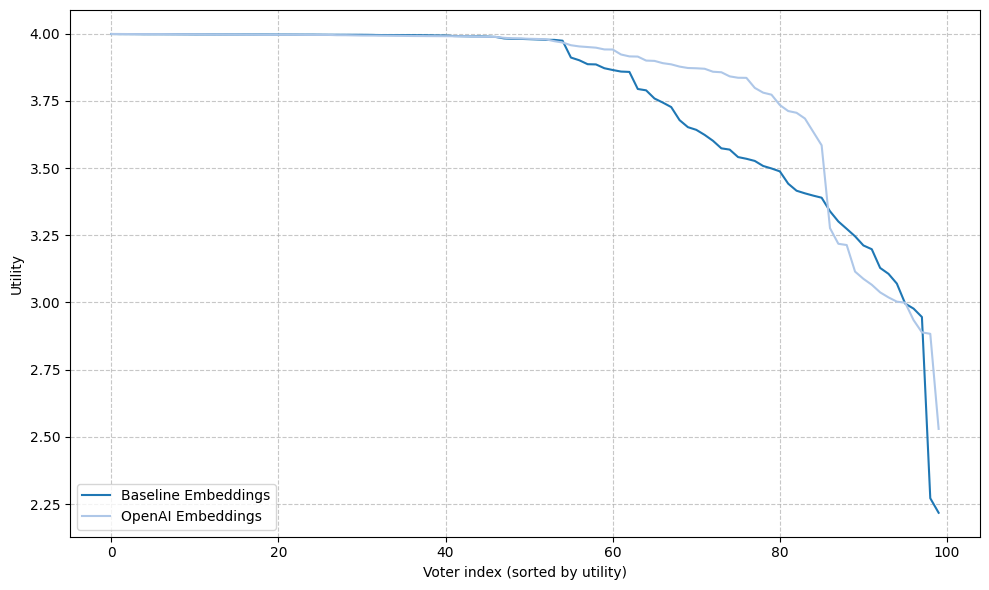

In [6]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_fig = plot_sorted_utility_distributions(embedding_ablation_utilities)

In [7]:
scalar_utility_metrics(embedding_ablation_utilities)

,Avg_Utility,Min_Utility,25th_Pctile_Utility,Gini
Baseline Embeddings,3.752362,2.217852,3.561705,0.046244
OpenAI Embeddings,3.809875,2.529911,3.839772,0.037781


## Multi-run

In [15]:
baseline_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_fish_nn*")
baseline_files = [d / "info.csv" for d in baseline_embedding_run_dirs]

baseline_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(baseline_files)
], axis=1)
baseline_utilities.columns = pd.MultiIndex.from_product([
    ["Baseline Embedding"], 
    baseline_utilities.columns
])

baseline_utilities.head()

Baseline Embedding                                          \
                               0         1         2         3         4   
Voter                                                                      
generation1             3.652164  3.419756  3.930224  3.734451  3.674032   
generation10            3.996646  3.995768  3.968564  3.993362  3.995934   
generation100           3.871335  3.935093  3.602703  3.954936  3.935633   
generation11            3.996955  3.996189  3.992691  3.992591  3.996861   
generation12            3.389729  3.505447  3.721042  3.323329  3.832001   

                                             
                      5         6         7  
Voter                                        
generation1    3.745700  3.820981  3.880952  
generation10   3.989841  3.982060  3.991400  
generation100  3.981460  3.931086  3.974949  
generation11   3.998290  3.996564  3.993663  
generation12   3.874439  3.926348  3.959825

In [16]:
# openai_embedding_files

In [17]:
openai_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_openai_embeddings*")
openai_embedding_files = [d / "info.csv" for d in openai_embedding_run_dirs]

openai_embedding_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(openai_embedding_files)
], axis=1)
openai_embedding_utilities.columns = pd.MultiIndex.from_product([
    ["OpenAI Embedding"], 
    openai_embedding_utilities.columns
])

openai_embedding_utilities.head()

OpenAI Embedding                                          \
                             0         1         2         3         4   
Voter                                                                    
generation1           3.898625  3.849859  3.889442  3.866531  3.875725   
generation10          3.990606  3.988506  3.994331  3.984539  3.978862   
generation100         3.872195  3.969437  3.894820  3.957064  3.847609   
generation11          3.996033  3.995450  3.993444  3.995308  3.995216   
generation12          3.950161  3.845123  3.927704  3.699785  3.829483   

                                   
                      5         6  
Voter                              
generation1    3.884814  3.888730  
generation10   3.993923  3.981263  
generation100  3.964658  3.987260  
generation11   3.995268  3.991671  
generation12   3.923565  3.597991

In [18]:
all_multirun_utilities = pd.concat([
    baseline_utilities,
    openai_embedding_utilities
], axis=1)

(50.0, 100.0)

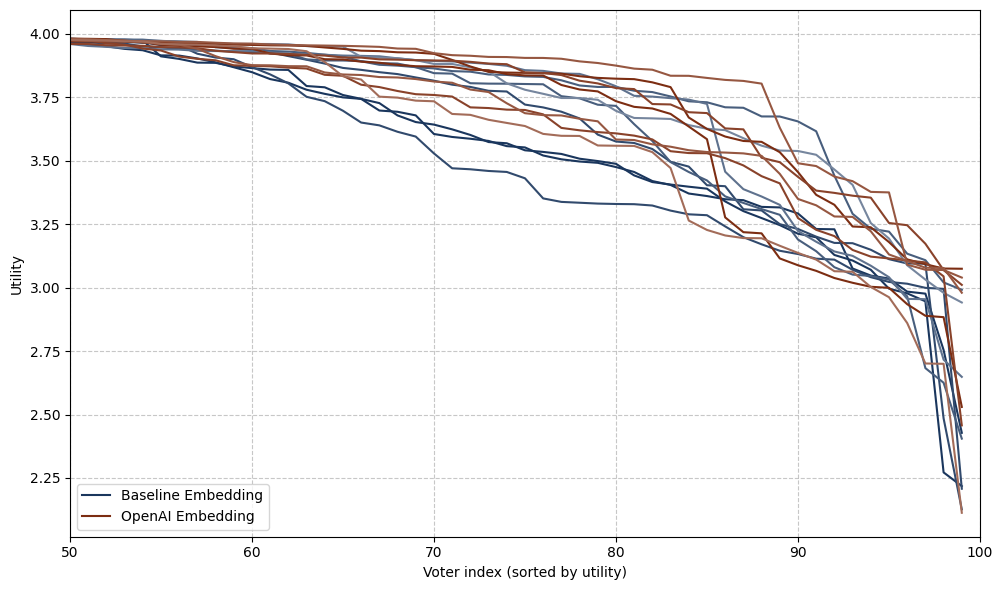

In [19]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_multi_fig = plot_sorted_utility_distributions(
    all_multirun_utilities.dropna(axis=1, how="any")
)
embedding_ablation_multi_fig.axes[0].set_xlim(50, 100)


(50.0, 100.0)

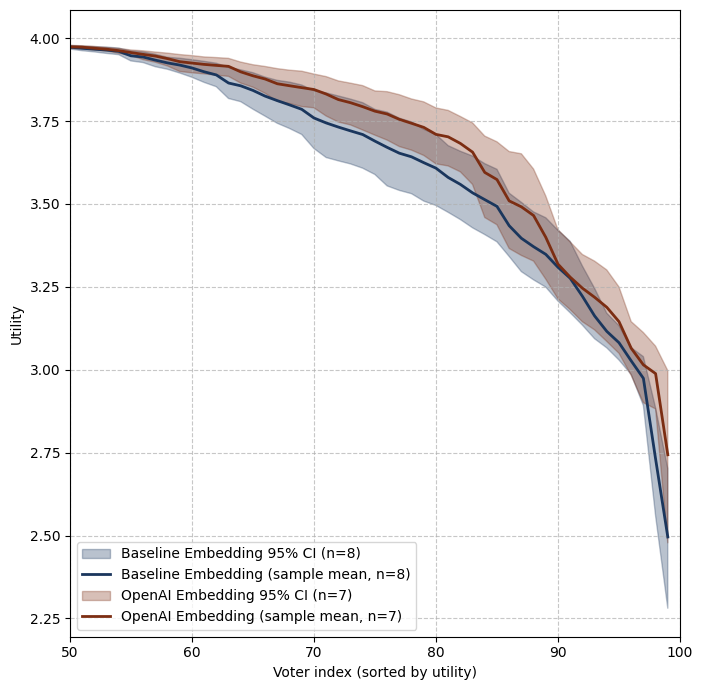

In [20]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_CIs

embedding_ablation_multi_fig = plot_sorted_utility_CIs(
    all_multirun_utilities.dropna(axis=1, how="any"),
    confidence_level=0.95,
    figsize=(7, 7),
)
embedding_ablation_multi_fig.axes[0].set_xlim(50, 100)

In [21]:
scalar_utility_metrics(all_multirun_utilities)

Avg_Utility  Min_Utility  25th_Pctile_Utility      Gini
Baseline Embedding 0     3.752362     2.217852             3.561705  0.046244
                   1     3.757577     2.427896             3.556035  0.043713
                   2     3.793090     2.126395             3.759668  0.039516
                   3     3.728445     2.207554             3.449368  0.049225
                   4     3.866658     2.991169             3.836407  0.025128
                   5     3.801209     2.404961             3.802960  0.039367
                   6     3.829539     2.648317             3.869663  0.033449
                   7     3.853367     2.941274             3.798397  0.027757
OpenAI Embedding   0     3.809875     2.529911             3.839772  0.037781
                   1     3.862189     3.074265             3.846868  0.026516
                   2     3.861006     3.010655             3.872018  0.025974
                   3     3.800434     2.457202             3.700775  0.036381
                   4     3.822024     2.979752             3.716425  0.032681
                   5     3.889059     3.039496             3.907438  0.021602
                   6     3.763429     2.112853             3.645687  0.045886